# Tarea 05
**Dayana Andrea Henao Arbeláez**

**1001469185**

In [349]:
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy.misc import derivative
import matplotlib.pylab as plt
from scipy import integrate


#1. Derivadas.


En el metodo Smoothed-particle hydrodynamics ([SPH](!https://en.wikipedia.org/wiki/Smoothed-particle_hydrodynamics)) se emplean diferentes kernel de aproximación para calcular las propiedades  de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

### Lucy's Quartic Kernel 
\begin{equation}
W(R, h)= \alpha_D \left\{
  \begin{matrix} \left(1+3q)(1- q\right)^3 &  0\leq q< h \\ 
  0 & in\ the\ other\ case.
  \end{matrix}
\right.
\end{equation}

donde, 

\begin{equation}
q=\frac{|(\vec{r}-\vec{r}')|}{h}
\end{equation}

y $\alpha_D$ es la constante de normalización:

- en 2 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{5}{\pi h^2}
\end{equation}

- en 3 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{105}{16\pi h^3}
\end{equation}

Para el kernel de Lucy en 2D encontrar su derivada a través de los siguientes pasos:

1. Realizar un gráfico del kernel de Lucy.
2. Encontrar la derivada empleanda la libreria simbolica
3. Realizar un grafico de los cálculos encontrados con la  libreria simbólica  y comparar con la derivada numérica de los datos del punto 1. 

Recuerde siempre comparar sus resultados con sus cálculos realizados en papel y lapiz.


Opcional.

Resolver el problema en 3D






**Gráfico del kernel de lucy**

In [350]:
def W(R,h):
  return (5/(np.pi*h**2))*(1+3*(R/h))*(1-(R/h))**3

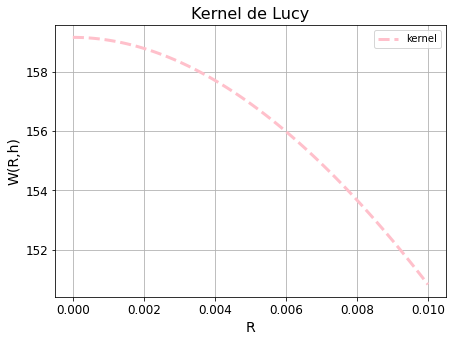

In [351]:
h=0.1
R=np.linspace(0,h**2,100)
plt.figure(figsize=(7,5))
plt.plot(R,W(R,h), label='kernel', color='pink', linestyle='--', linewidth='3')
plt.title('Kernel de Lucy', fontsize='16')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('R', fontsize='14')
plt.ylabel('W(R,h)', fontsize='14')
plt.legend()
plt.grid()

**Derivada usando la libreria simbólica**

In [352]:
R = sp.symbols("R")
w = lambda R: (5/((sp.pi)*(0.1**2)))*(1+3*(R/0.1))*(1-(R/0.1))**3
w(R)

500000.0*(0.1 - R)**3*(30.0*R + 1)/pi

In [353]:
derivada = sp.diff(w(R),R, 1)
derivada

15000000.0*(0.1 - R)**3/pi - 1500000.0*(0.1 - R)**2*(30.0*R + 1)/pi

In [354]:
def derw(R):
  return (((15000000*(0.1-R)**3)-((1500000*(0.1-R)**2))*(30*R+1)))/np.pi

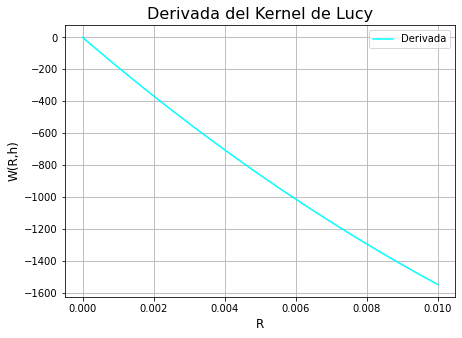

In [355]:
h=0.1
R=np.linspace(0,h**2,100)
plt.figure(figsize=(7,5))
plt.plot(R,derw(R), label='Derivada', color='cyan')
plt.title('Derivada del Kernel de Lucy', fontsize=16)
plt.xlabel('R', fontsize=12)
plt.ylabel('W(R,h)', fontsize=12)
plt.legend()
plt.grid()

**Derivada númerica**

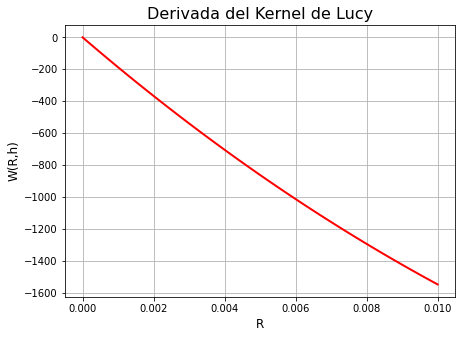

In [356]:
func=lambda R: (5/(np.pi*0.1**2))*(1+3*(R/0.1))*(1-(R/0.1))**3
R=np.linspace(0,0.1**2,100)
plt.figure(figsize=(7,5))
plt.plot( R, derivative(func,R,dx=1E-5), color="red", label="$f'(x)$", linewidth=2)
plt.title('Derivada del Kernel de Lucy', fontsize=16)
plt.xlabel('R', fontsize=12)
plt.ylabel('W(R,h)', fontsize=12)
plt.grid()




# 2.0 Integración

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson

3. Calcular una aproximación con el metodo 1,2 y el de cuadratura de las siguientes integrales

garantizando  que el error sea menor a $\varepsilon=1E-5$.  

**Método del trapecio**

$$ \int_a^b f(x) dx = \frac{h}{2}\left[ f(a) + 2\sum_{j=1}^{N-1}f(x_j) + f(b) \right] - \frac{b-a}{12}h^2 f^{''}(\mu)$$

**Método de simpson**

$$ \int_a^bf(x)dx = \frac{h}{3}\left[ f(a) +2 \sum_{j=1}^{(n/2)-1}f(x_{2j})+4\sum_{j=1}^{n/2}f(x_{2j-1})+f(b) \right] - \frac{b-a}{180}h^4f^{(4)}(\mu)$$

**Solución de las integrales**


- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$

In [357]:
def f1(x):
  return np.exp(1-np.sqrt(x))

In [358]:
#Método del trapecio
X=[0,np.pi]
x=np.linspace( X[0], X[-1], 1000 )
integrate.trapz(f1(x),x)

2.8755895688432083

In [359]:
#Método de simpson
integrate.simps(f1(x),x)

2.87555082821594

In [360]:
#Método de cuadratura
integrate.quad(f1,0,np.pi,args=(),full_output=0)[0]

2.8754911354375863

- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$


In [361]:
def f2(x):
  return 1/(np.sqrt(np.tan(x)))

In [362]:
#Método del trapecio
X2=[0.001,np.pi/2]
x2=np.linspace( X2[0], X2[-1], 1000 )
integrate.trapz(f2(x2),x2)

2.161123425655332

In [363]:
#Método de simpson
integrate.simps(f2(x2),x2)

2.159570043155357

In [364]:
#Método de cuadratura
integrate.quad(f2,0,np.pi/2,args=(),full_output=0)[0]

2.2214414690792026

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

In [365]:
def f3(x):
  return 1/(1+x**2)

In [366]:
#Método del trapecio
X3=[-400,400]
x3=np.linspace( X3[0], X3[-1], 1000 )
integrate.trapz(f3(x3),x3)

3.1341352370139304

In [367]:
#Método de simpson
integrate.simps(f3(x3),x3)

3.134135240363955

In [368]:
#Método de cuadratura
integrate.quad(f3,-np.inf,np.inf,args=(),full_output=0)[0]

3.141592653589793

- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$


In [369]:
def f5(x):
  return 1/(np.log(x))

In [370]:
#Método del trapecio
X5=[np.e,2*np.e]
x5=np.linspace( X5[0], X5[-1], 1000 )
integrate.trapz(f5(x5),x5)

2.003810749013251

In [371]:
#Método de simpson
integrate.simps(f5(x5),x5)

2.0038105619858713

In [372]:
#Método de cuadratura
integrate.quad(f5,np.e,np.e*2,args=(),full_output=0)[0]

2.0038105616240243

5. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity

In [373]:
integ=integrate.quad(lambda z:z**-2,1,np.inf,args=(),full_output=0)[0]
integ

1.0

In [374]:
G=9.8
R=6371000

In [375]:
def v(g,r,inte):
  return np.sqrt(2*g*R*inte)

In [376]:
v(G,R,integ)

11174.596189572132

*La velocidad de escape es 11175 m/s aproximadamente.*


6. Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}





In [377]:
def trap(f,a,b,n):  #Regla trapezoidal
    h = (b - a) / n
    intgr =0
    for i in range(1, int(n)):
        intgr+= 0.5 * h * (f(a+(i-1)*h) + f(a+i*h))
    return intgr

def Trapecio(f,a,b,n,test=0): #Otra forma de la regla del trapezoidal
  import numpy as np
  x=np.linspace(a,b,n+1)
  y=f(x)
  if test == 0:
      return 0.5*np.dot((x[1:]-x[:-1]),(y[1:]+y[:-1]))
  elif test ==1:
      return 0.5*((x[1:]-x[:-1])*(y[1:]+y[:-1])).sum()

def simpson1_3(f, a, b, n):  #Regla de Simpson 1/3
    h = (b - a) / n
    suma = 0.0
    for i in range(1, n):
        x = a + i * h
        if(i % 2 == 0): 
            suma = suma + 2 * f(x)
        else:
            suma = suma + 4 * f(x)
    suma = suma + f(a) + f(b)
    area = suma * (h / 3)
    return area


In [378]:
def N(t):
  return np.exp(-t)

In [379]:
def error(num,ext):
  return np.abs(num-ext)/ext

6.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | 
|----|---------------|--------------|
|   2  | 0.020325350385163334|0.0003370391011018477|
|   10  |  0.0008325008424003651|5.548945654797766e-07|
|   20  |0.00020828126317234676|3.4711889408821485e-08|
|   40  |5.208007833065576e-05| 2.169976856603742e-09|
|   80  |1.3020629885747526e-05|1.356309085165515e-10|
|   160 |3.2551956174372455e-06|8.47718425823847e-12|

In [380]:
exact=integrate.quad(N,0,1,args=(),full_output=0)[0]
exact

0.6321205588285578

In [381]:
# Para N=2
Et2=Trapecio(N,0,1,2)
Es2=simpson1_3(N,0,1,2)
print('El error con el método del Trapecio es: ', error(exact,Et2))
print('El error con el método de Simpson es: ', error(exact,Es2))

El error con el método del Trapecio es:  0.020325350385163334
El error con el método de Simpson es:  0.0003370391011018477


In [382]:
# Para N=10
Et10=Trapecio(N,0,1,10)
Es10=simpson1_3(N,0,1,10)
print('El error con el método del Trapecio es: ', error(exact,Et10))
print('El error con el método de Simpson es: ', error(exact,Es10))

El error con el método del Trapecio es:  0.0008325008424003651
El error con el método de Simpson es:  5.548945654797766e-07


In [383]:
# Para N=20
Et20=Trapecio(N,0,1,20)
Es20=simpson1_3(N,0,1,20)
print('El error con el método del Trapecio es: ', error(exact,Et20))
print('El error con el método de Simpson es: ', error(exact,Es20))

El error con el método del Trapecio es:  0.00020828126317234676
El error con el método de Simpson es:  3.4711889408821485e-08


In [384]:
# Para N=40
Et40=Trapecio(N,0,1,40)
Es40=simpson1_3(N,0,1,40)
print('El error con el método del Trapecio es: ', error(exact,Et40))
print('El error con el método de Simpson es: ', error(exact,Es40))

El error con el método del Trapecio es:  5.208007833065576e-05
El error con el método de Simpson es:  2.169976856603742e-09


In [385]:
# Para N=80
Et80=Trapecio(N,0,1,80)
Es80=simpson1_3(N,0,1,80)
print('El error con el método del Trapecio es: ', error(exact,Et80))
print('El error con el método de Simpson es: ', error(exact,Es80))

El error con el método del Trapecio es:  1.3020629885747526e-05
El error con el método de Simpson es:  1.356309085165515e-10


In [386]:
# Para N=160
Et160=Trapecio(N,0,1,160)
Es160=simpson1_3(N,0,1,160)
print('El error con el método del Trapecio es: ', error(exact,Et160))
print('El error con el método de Simpson es: ', error(exact,Es160))

El error con el método del Trapecio es:  3.2551956174372455e-06
El error con el método de Simpson es:  8.47718425823847e-12
